In [1]:
import os
import tempfile

trial_pp = {"estimand": "PP"}
trial_itt = {"estimand": "ITT"}

In [2]:
trial_pp_dir = os.path.join(tempfile.gettempdir(), "trial_pp")
os.makedirs(trial_pp_dir, exist_ok=True)

trial_itt_dir = os.path.join(tempfile.gettempdir(), "trial_itt")
os.makedirs(trial_itt_dir, exist_ok=True)

print("Directories created:", trial_pp_dir, trial_itt_dir)

Directories created: C:\Users\Arkane\AppData\Local\Temp\trial_pp C:\Users\Arkane\AppData\Local\Temp\trial_itt


In [3]:
import pandas as pd

data_censored = pd.read_csv("data_censored.csv")
print(data_censored.head())

   Unnamed: 0  id  period  treatment  x1        x2  x3        x4  age  \
0           1   1       0          1   1  1.146148   0  0.734203   36   
1           2   1       1          1   1  0.002200   0  0.734203   37   
2           3   1       2          1   0 -0.481762   0  0.734203   38   
3           4   1       3          1   0  0.007872   0  0.734203   39   
4           5   1       4          1   1  0.216054   0  0.734203   40   

      age_s  outcome  censored  eligible  
0  0.083333        0         0         1  
1  0.166667        0         0         0  
2  0.250000        0         0         0  
3  0.333333        0         0         0  
4  0.416667        0         0         0  


# Apply Clustering Before Step 3
- For better patient subgrouping and model stability
- First we need to visualize the data:

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

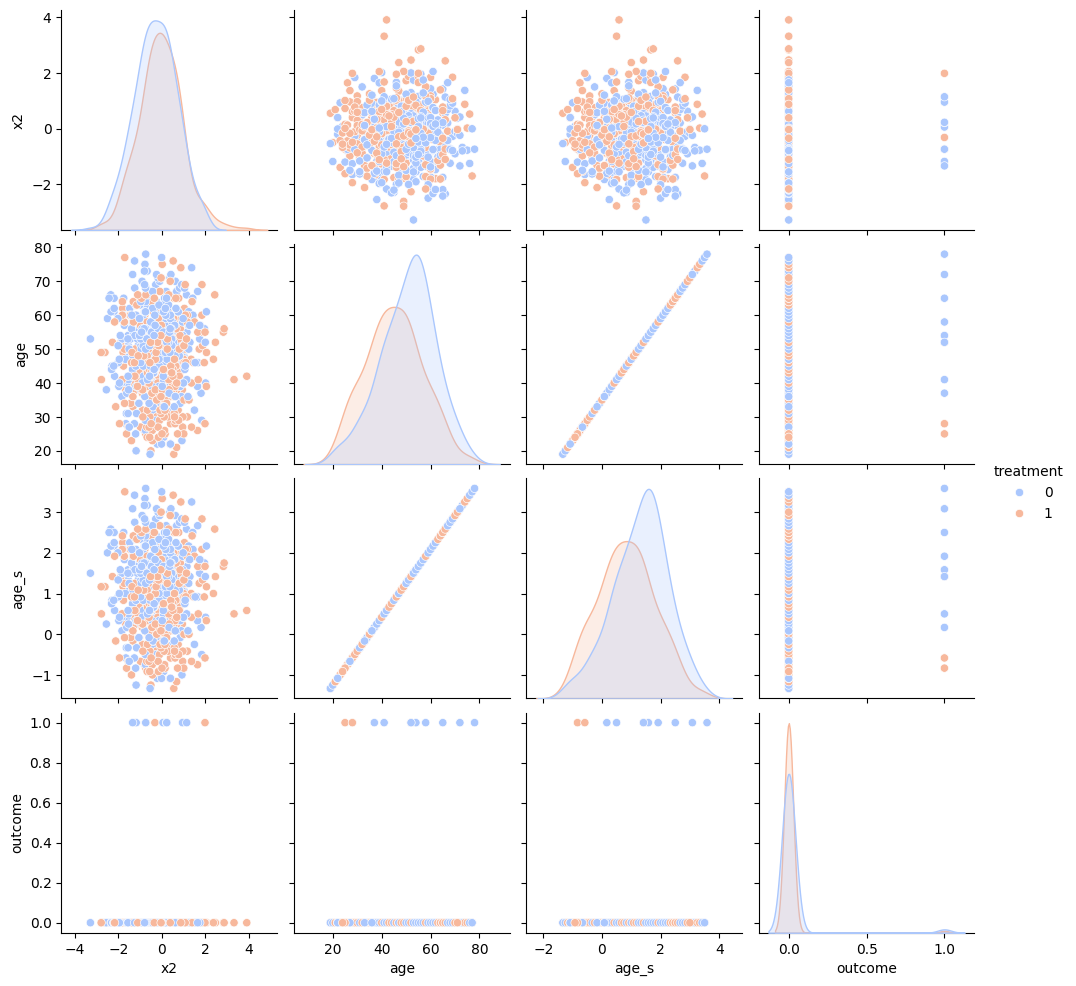

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["x2", "age", "age_s", "outcome"]

# Pairplot
sns.pairplot(data_censored, vars=num_cols, hue="treatment", diag_kind="kde", palette="coolwarm")
plt.show()

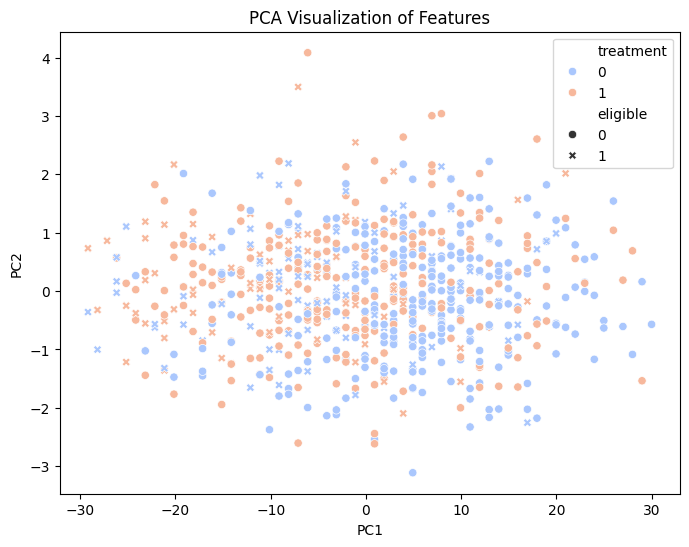

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Select numerical columns
num_cols = ["x2", "age", "age_s", "outcome"]

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_censored[num_cols])
data_censored["PC1"], data_censored["PC2"] = df_pca[:, 0], df_pca[:, 1]

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data_censored,
    x="PC1",
    y="PC2",
    hue="treatment",
    style="eligible",
    palette="coolwarm"
)
plt.title("PCA Visualization of Features")
plt.show()


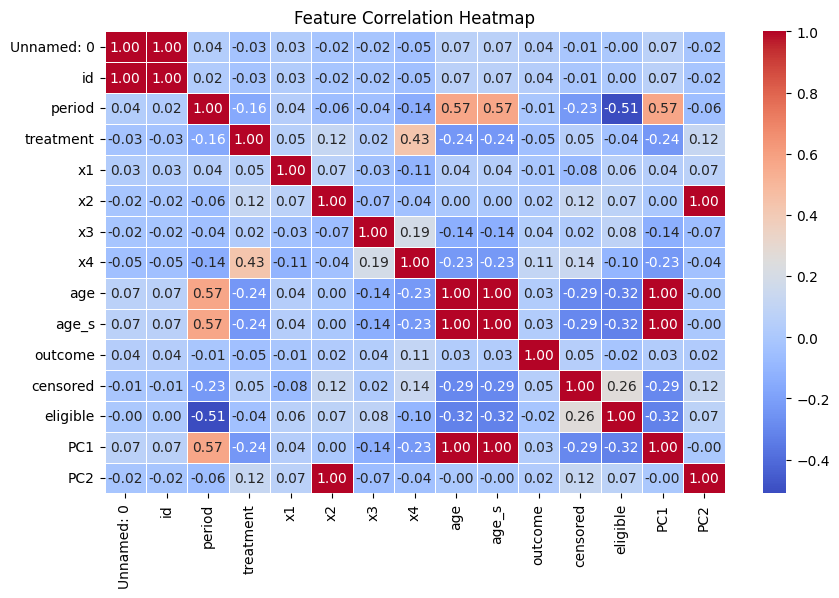

In [16]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(data_censored.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Analysis
- age and age_s dominate the variance in the dataset.
- x2 is another strong contributor but is largely independent of age.
- PCA is not capturing interactions between features effectively.